In [1]:
import pandas as pd

In [2]:
injections_per_fm = 200

In [3]:
df = pd.read_csv("./results_stdout.csv")
df.columns = ["Group", "Type", *df.columns[2:]]
df

,Group,Type,Output error,Classification error,Other error
0,fp32,FLIP_SINGLE_BIT,7.0,1.0,0.0
1,fp32,FLIP_TWO_BITS,8.0,2.0,0.0
2,fp32,RANDOM_VALUE,38.5,6.0,0.0
3,fp32,ZERO_VALUE,17.0,0.0,0.0
4,gp,FLIP_SINGLE_BIT,12.0,0.0,3.5
5,gp,FLIP_TWO_BITS,10.5,1.0,4.5
6,gp,RANDOM_VALUE,38.5,7.0,9.5
7,gp,ZERO_VALUE,17.5,0.0,6.0


<Axes: title={'center': 'GP error measurements'}, xlabel='Type', ylabel='error rate %'>

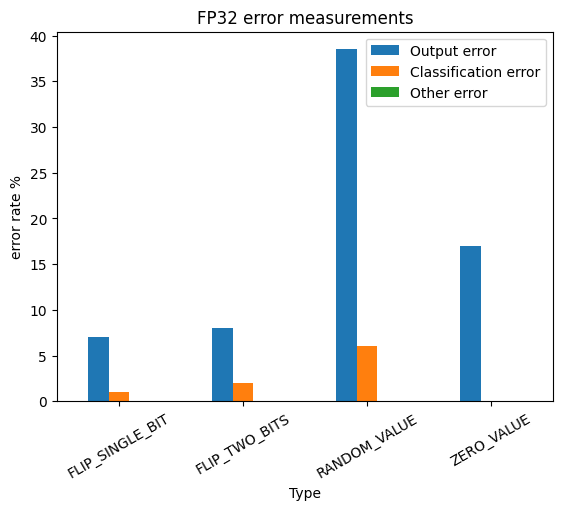

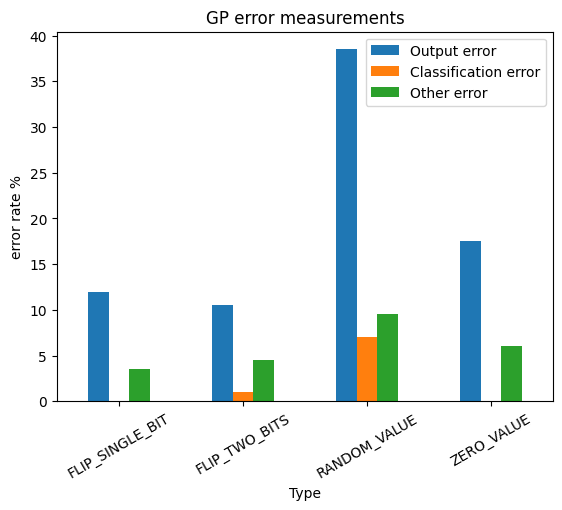

In [4]:
df_fp32 = df[df["Group"] == "fp32"]
df_gp = df[df["Group"] == "gp"]
df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_fp32.plot(kind="bar", ylabel="error rate %", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel="error rate %", title="GP error measurements", rot=30)

In [5]:
df_kernels = pd.read_csv("./results_kernel.csv")
df_kernels.columns = ["Kernel", *df_kernels.columns[1:]]
df_kernels

,Kernel,Output error,Classification error,Masked,Other error
0,volta_sgemm_64x32_sliced1x4_tn,133,1,502,23
1,volta_sgemm_128x32_tn,142,31,663,29
2,voidattention_kernel_batched<AttentionKernel<f...,11,2,65,1
3,voidat::native::vectorized_elementwise_kernel<...,2,0,11,1
4,"voidimplicit_convolve_sgemm<float,float,1024,5...",10,0,4,0
5,voidat::native::(anonymousnamespace)::vectoriz...,0,0,6,1


<Axes: xlabel='Kernel'>

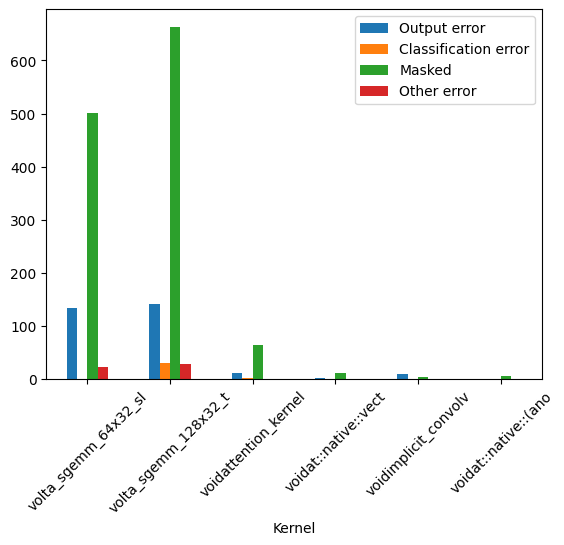

In [6]:
df_kernels.index = pd.Series([k[:20] for k in df_kernels["Kernel"]], name="Kernel")
df_kernels.plot(kind="bar", rot=45,)